In [11]:
import sys
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np

sys.path.append("/Users/martinedh/Documents/NTNU/GitHub/FysMat/Prosjektoppgave")
from main import solve_and_return_system_and_F_matrix as solve
from plots import plot_pairing_amplitude, plot_density_of_states

In [2]:
# recrod runtime
import timeit
start = timeit.default_timer()


system, F_matrix = solve() # NC(50) - SOC(2) - SC(50)
#mu_orbital = -3.5, orbital_indicator = 's', F_sc_initial_orbital = [0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3])

# print runtime
stop = timeit.default_timer()
print('Time: ', stop - start) 

Hermition:  True
Iteration nr. 1
delta_diff =  82.43745780207874
Iteration nr. 2
delta_diff =  27.391875397025565
Iteration nr. 3
delta_diff =  2.4435209593605
Iteration nr. 4
delta_diff =  2.1385507401186263
Iteration nr. 5
delta_diff =  0.5475593400561053
Iteration nr. 6
delta_diff =  0.22061982876876363
Iteration nr. 7
delta_diff =  0.10224022130990809
Iteration nr. 8
delta_diff =  0.050429310351325404
Iteration nr. 9
delta_diff =  0.02549026253529254
Iteration nr. 10
delta_diff =  0.012953450519901542
Iteration nr. 11
delta_diff =  0.0065576365483444535
Iteration nr. 12
delta_diff =  0.0032937694111539063
Iteration nr. 13
delta_diff =  0.0016386698856192075
Iteration nr. 14
delta_diff =  0.0008069439153040378
Iteration nr. 15
delta_diff =  0.0003931687242661336
Iteration nr. 16
delta_diff =  0.00018945203419982662
Iteration nr. 17
delta_diff =  9.021526055970832e-05
Time:  114.31626953900559


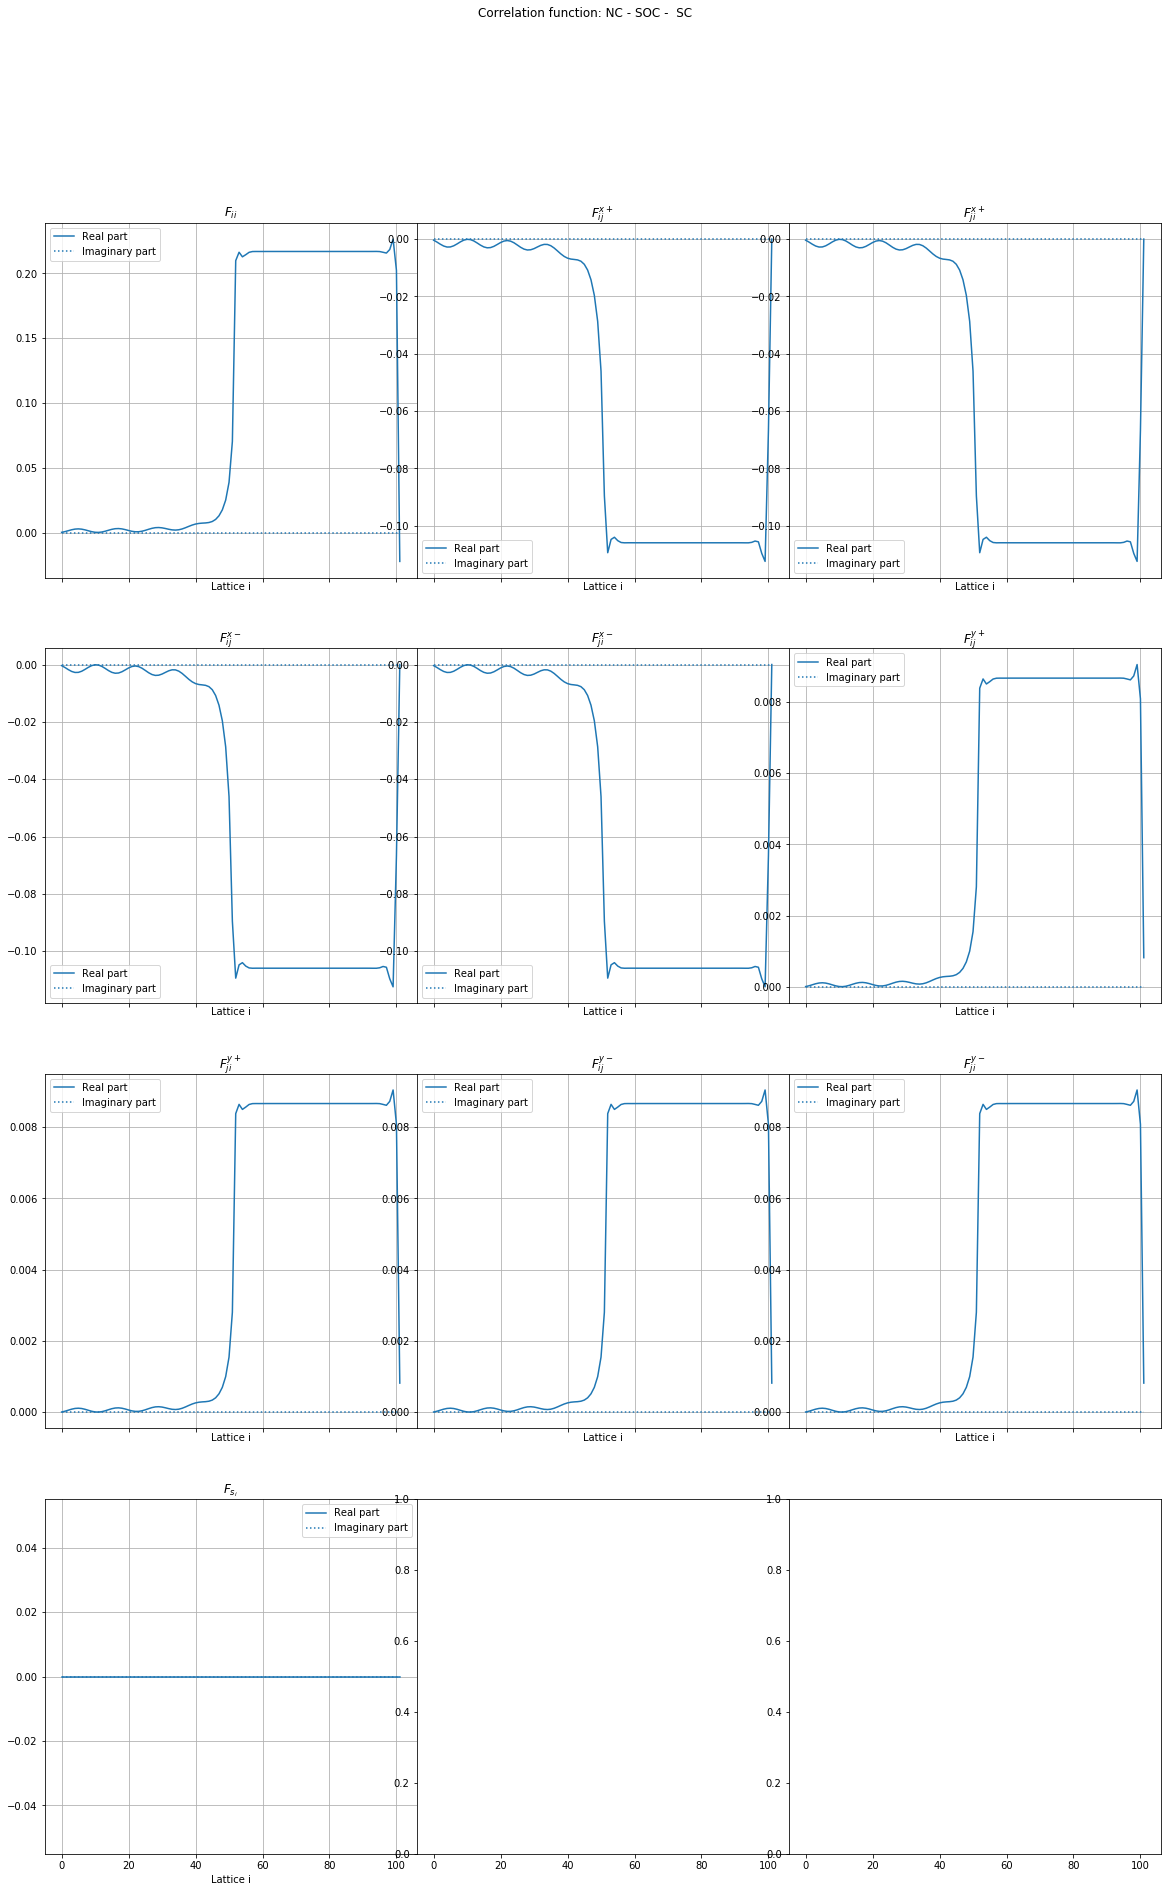

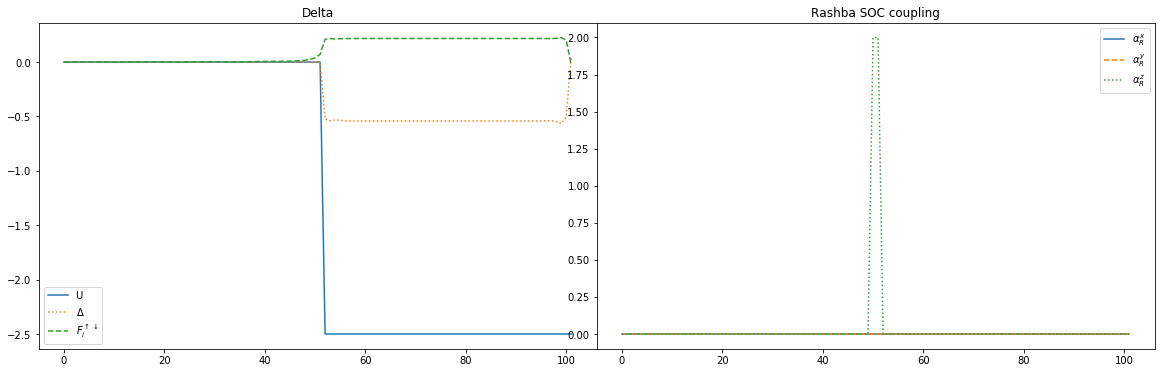

In [3]:
plot_pairing_amplitude(system, F_matrix) 
# it 1: diff 80.31784729526646
# it 2: diff 13.608228168595833

In [4]:
# recrod runtime
import timeit
start = timeit.default_timer()

ldos, es = system.ldos_from_problem(0.01, 0.03, -1, 1)

# print runtime
stop = timeit.default_timer()
print('Time: ', stop - start) 

Time:  13.657986202000757


In [5]:
print(ldos.shape)
print(es.shape)

(102, 200)
(200,)


(200,)
(102, 200)


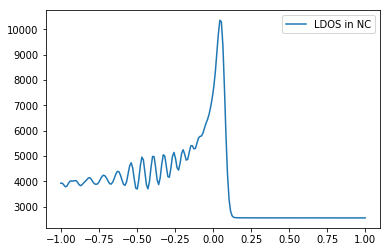

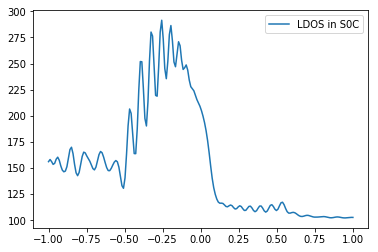

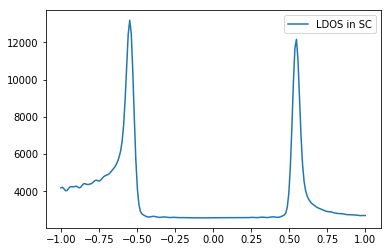

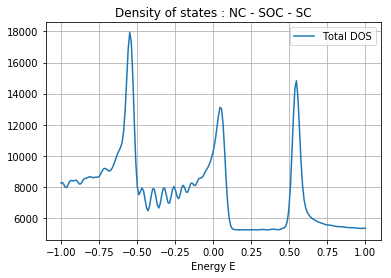

In [6]:
plot_density_of_states(es, ldos)

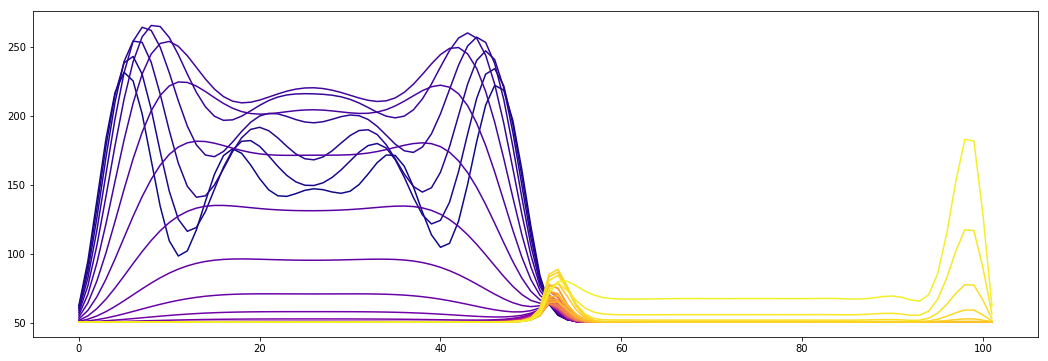

In [8]:
fig = plt.figure(figsize=(18, 6))
Ne = ldos.shape[1]
step = 1
delta_range = 50
start = Ne//2
stop = min(Ne//2+delta_range, Ne)
for i in range(start, stop, step):
    plt.plot(ldos[:, i], c = cm.plasma(float(i-start)/(stop-start)))

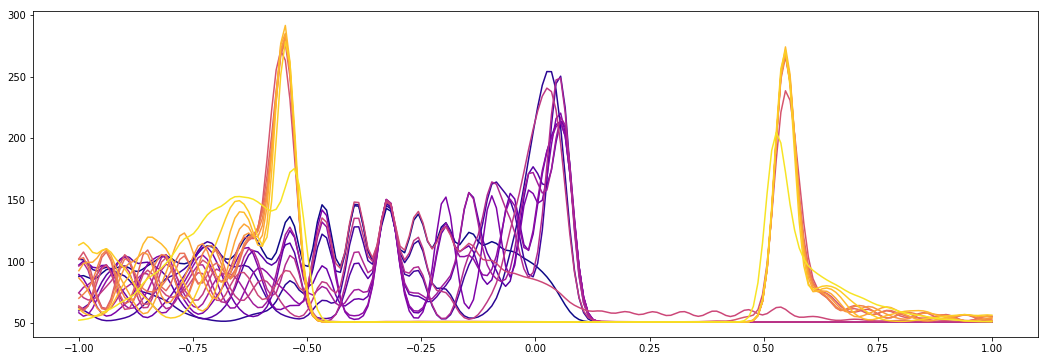

In [9]:
fig, ax = plt.subplots(figsize=(18, 6))
Nx = ldos.shape[0]
step = 5
delta_range = 50
start = max(Nx//2-delta_range, 0)
stop = min(Nx//2+delta_range, Nx)
#stop = Nx//2
for i in range(start, stop, step):
    ax.plot(es, ldos[i, :], c = cm.plasma(float(i-start)/(stop-start)))
#ax.set_xlim()

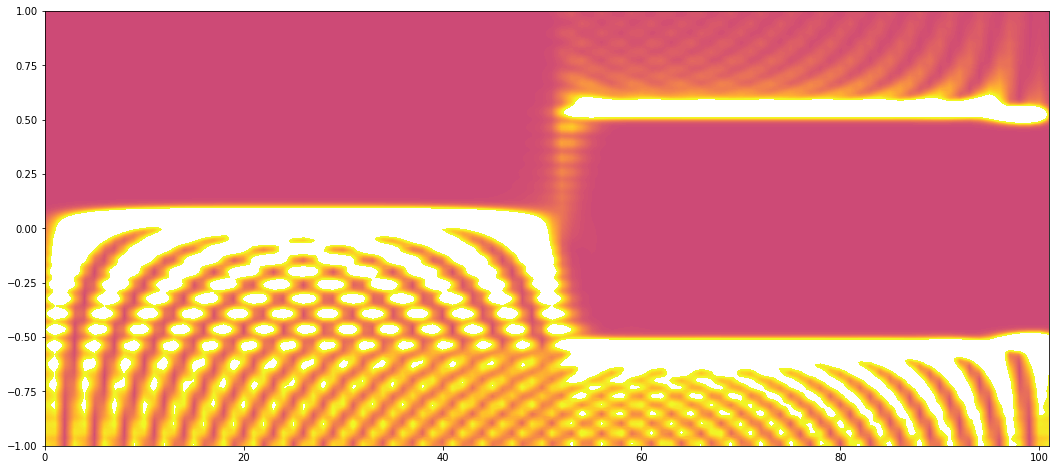

In [15]:
fig, ax = plt.subplots(figsize=(18, 8))
ax.contourf(np.arange(102), es, ldos.T, cmap=cm.plasma, levels=np.linspace(0, 100, 100))

In [7]:
import numpy as np
a = np.ones((4,4))
b = np.ones((5,5))

In [8]:
for i in range(len(a)):
    for j in range(len(a)):
        a[i][j] += i*2 + j
        b[j][i] += i*5+j
        
print(a)
print(b)

[[ 1.  2.  3.  4.]
 [ 3.  4.  5.  6.]
 [ 5.  6.  7.  8.]
 [ 7.  8.  9. 10.]]
[[ 1.  6. 11. 16.  1.]
 [ 2.  7. 12. 17.  1.]
 [ 3.  8. 13. 18.  1.]
 [ 4.  9. 14. 19.  1.]
 [ 1.  1.  1.  1.  1.]]


In [10]:
a[2:,2:]

array([[ 7.,  8.],
       [ 9., 10.]])

In [6]:
np.tanh(b[2,:])

array([0.99505475, 0.99999977, 1.        , 1.        , 1.        ])

In [15]:
np.sum(a[0,:]*b[2,:])

245.0

In [14]:
np.matmul(a[0,:],b[2,:])

245.0